<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


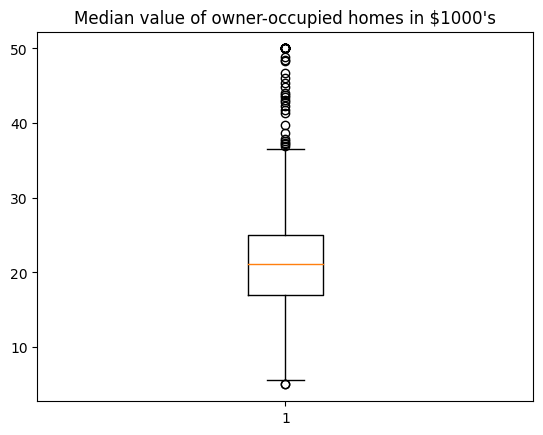

In [7]:
pyplot.boxplot(boston_df["MEDV"])
pyplot.title("Median value of owner-occupied homes in $1000's")
pyplot.show()

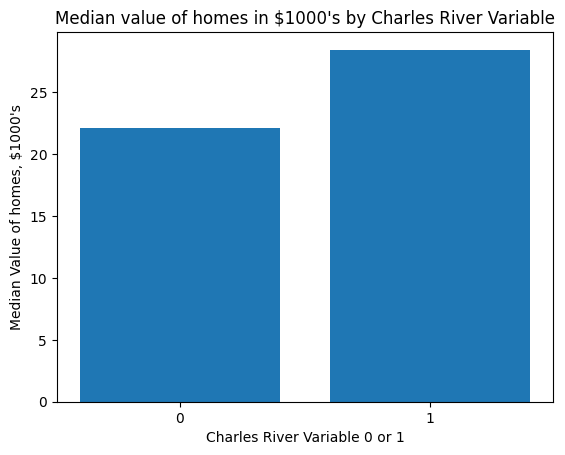

In [8]:
ch_0=boston_df.loc[boston_df["CHAS"]==0]["MEDV"].mean()
ch_1=boston_df.loc[boston_df["CHAS"]==1]["MEDV"].mean()
pyplot.title("Median value of homes in $1000's by Charles River Variable")
pyplot.xlabel("Charles River Variable 0 or 1")
pyplot.ylabel("Median Value of homes, $1000's")
pyplot.bar(['0','1'],[ch_0,ch_1])
pyplot.show()

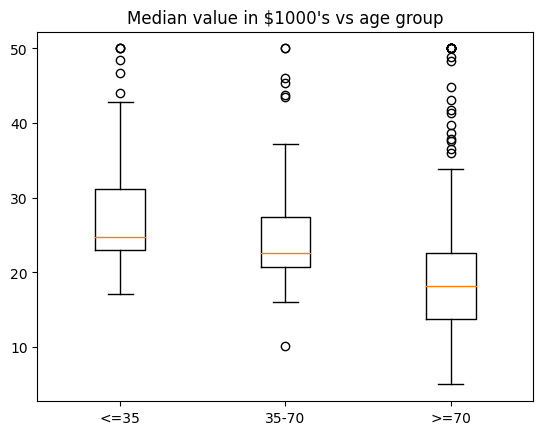

In [9]:
data1=boston_df.loc[boston_df['AGE']<=35]['MEDV']
data2=boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70)]['MEDV']
data3=boston_df.loc[boston_df['AGE']>=70]['MEDV']
data=[data1, data2, data3]
pyplot.boxplot(data, labels=['<=35','35-70','>=70'])
pyplot.title("Median value in $1000's vs age group")
pyplot.show()

Text(0, 0.5, 'NO2 concentrations parts per 10 million')

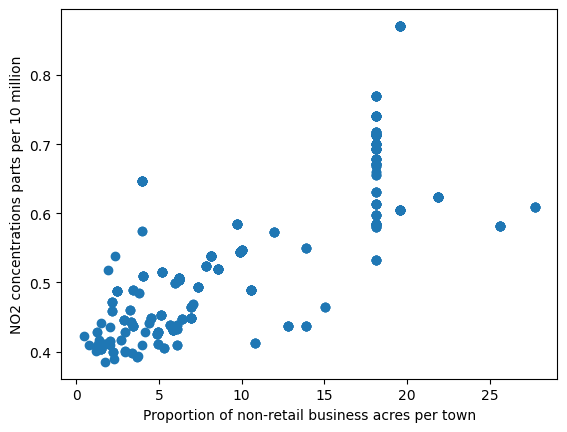

In [19]:
pyplot.scatter(boston_df['INDUS'],boston_df['NOX'])
pyplot.xlabel('Proportion of non-retail business acres per town')
pyplot.ylabel("NO2 concentrations parts per 10 million")
# there seems to be relationship between INDUS and NOX

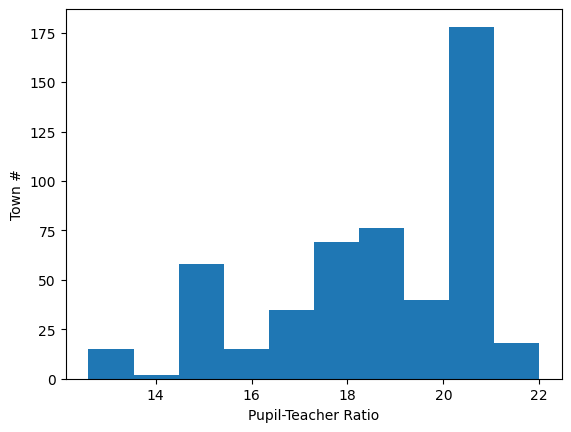

In [10]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Town #')
pyplot.show()

In [15]:
# Is there a significant difference in median value of houses bounded by the Charles river or not?
# H0: no difference in median value of houses by the Charles river 
# H1: significant difference in median value of houses by the Charles river
X1=boston_df.loc[boston_df["CHAS"] == 0]["MEDV"]
X2=boston_df.loc[boston_df["CHAS"] == 1]["MEDV"]
scipy.stats.levene(X1, X2, center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [12]:
scipy.stats.ttest_ind(X1, X2, equal_var=False)
# Conclusion - since the p-value is less than alpha value 0.05, we reject the null hypothesis
# i.e. there is enough proof that there is a statistical difference in median value of houses
#      by the Charles river

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [13]:
# Is there a difference in MEDV for each proportion of owner occupied units built prior to 1940 (AGE)?
# H0: MEDV are equal for each AGE group
# H1: at least one of the median is different

In [17]:
boston_df.loc[boston_df['AGE']<=35, 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = 'between 35 and 70'
boston_df.loc[boston_df['AGE']>=70, 'age_group'] = '70 and older'

data1=boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
data2=boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
data3=boston_df[boston_df['age_group'] == '70 and older']['MEDV']

scipy.stats.levene(data1, data2, data3, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(data1, data2, data3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
# Conclusion - since the p-value is less than alpha value 0.05, we reject the null hypothesis
# i.e. at least one of the means is different

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [20]:
# Can we conclude that there is no relationship between Nitric oxide concentrations 
# and proportion of non-retail business acres per town?
#
# H0: Nitric oxide concentrations are independent on proportion of non-retail business acres per town
# H1: Nitric oxide concentrations are dependent on proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# Conclusion - since the p-value is less than alpha value 0.05, we reject the null hypothesis
# i.e. there exists a relationship between Nitric oxide concentrations 
#      and proportion of non-retail business acres per town

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [6]:
# What is the impact of an additional weighted distance to the five Boston employment centres
# on the median value of owner occupied homes?
#
# H0: an additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes
# H1: an additional weighted distance to the five Boston employment centres has impact on the median value of owner occupied homes

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        03:34:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Conclusion: the p-value is less than alpha value 0.05. we reject null hypothesis.
# an additional weighted distance get 1.0916 more median value of owner occupied homes